# Inicialización

In [1]:
from skimage import io
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [3]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [4]:
from scipy import ndimage as ndi
from skimage.segmentation import clear_border

In [5]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Cargar la imagen

In [6]:
pintura_puntos = rgb2gray(io.imread(fname='img/Pintura_Puntos.jpg'))

# Escribe tu código aquí

In [7]:
lista_algortimo_img_dicos=dict()
n_iteraciones = 5

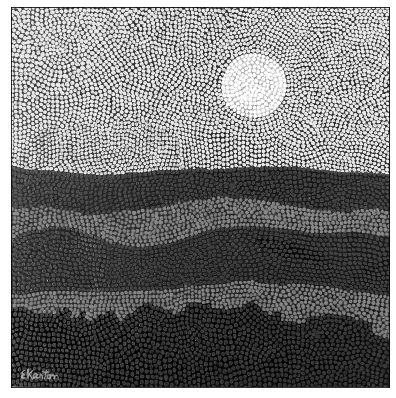

In [8]:
imshow(pintura_puntos)

In [9]:
imagenes_cercanas=dict()

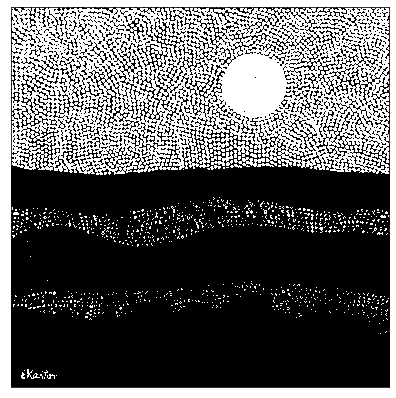

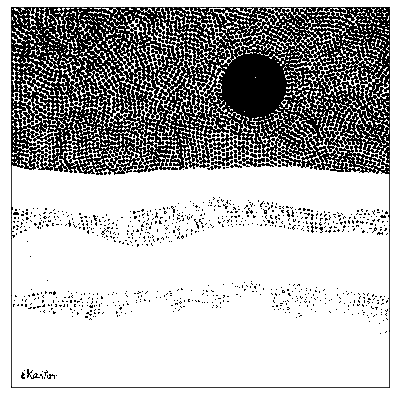

In [10]:
val_otsu=threshold_otsu(pintura_puntos)
img_otsu = pintura_puntos>val_otsu
imshow(img_otsu)
imshow(~img_otsu)

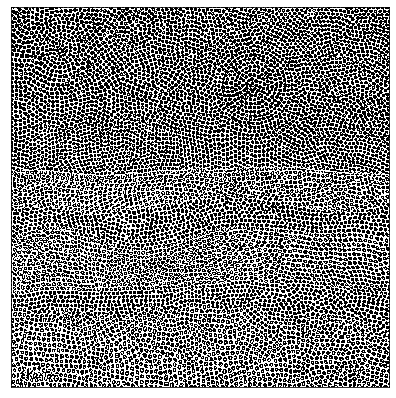

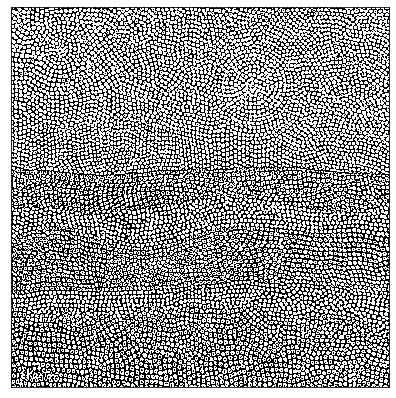

In [11]:
val_local=threshold_local(pintura_puntos, 15, 'mean')
img_local = pintura_puntos<val_local
imshow(img_local)
imshow(~img_local)

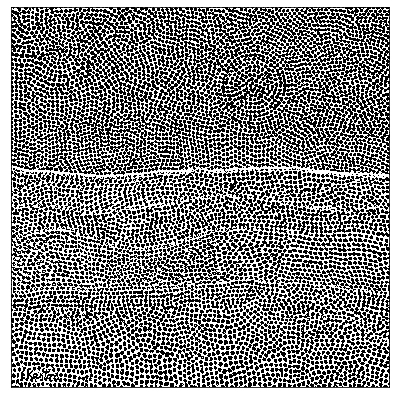

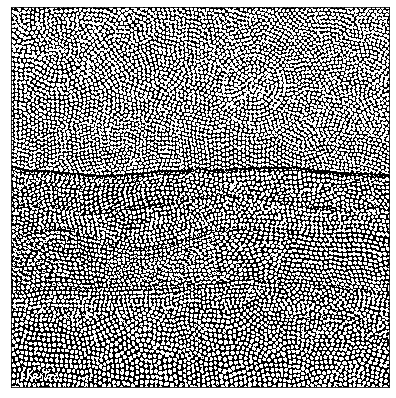

In [12]:
val_local=threshold_local(pintura_puntos, 35, 'mean')
img_local = pintura_puntos<val_local
imshow(img_local)
imshow(~img_local)

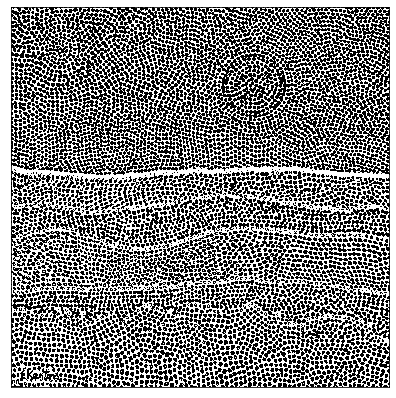

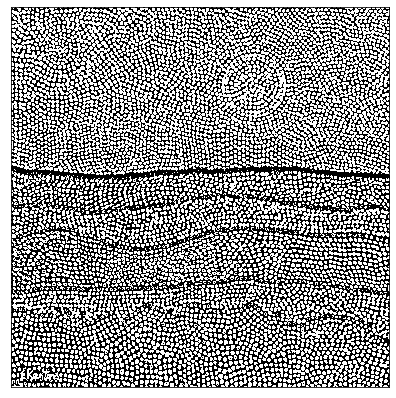

In [13]:
val_local=threshold_local(pintura_puntos, 55, 'mean')
img_local = pintura_puntos<val_local
imshow(img_local)
imshow(~img_local)
imagenes_cercanas["local_mean"]=~img_local

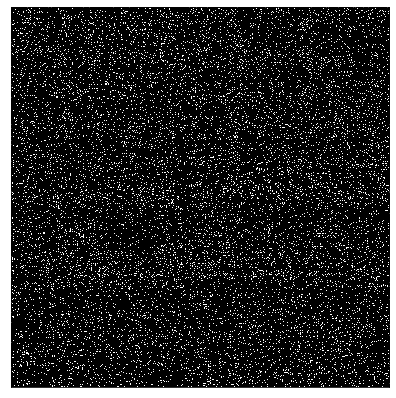

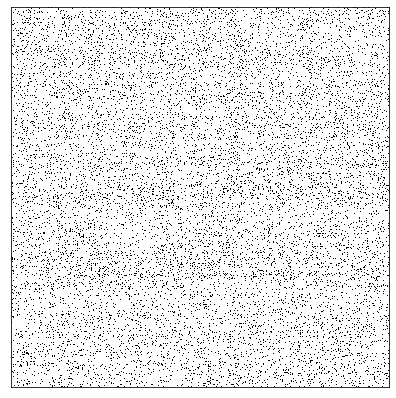

In [14]:
val_niblack=threshold_niblack(pintura_puntos, window_size=5, k=0.8)
img_niblack = pintura_puntos<val_niblack
imshow(img_niblack)
imshow(~img_niblack)

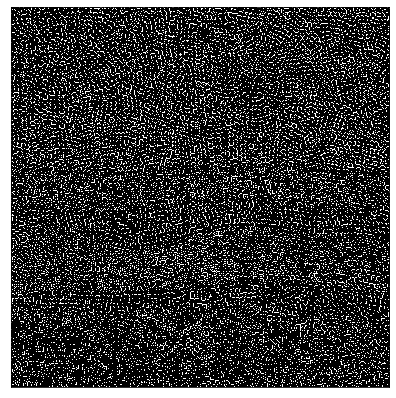

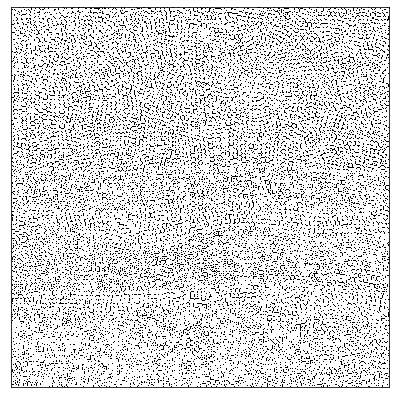

In [15]:
val_niblack=threshold_niblack(pintura_puntos, window_size=11, k=0.8)
img_niblack = pintura_puntos<val_niblack
imshow(img_niblack)
imshow(~img_niblack)

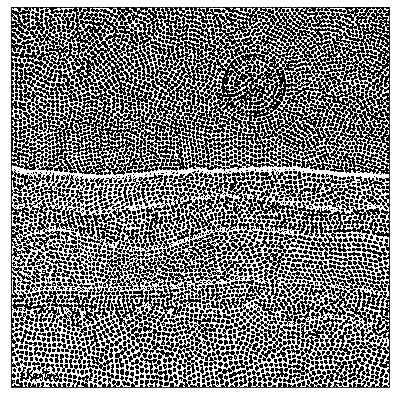

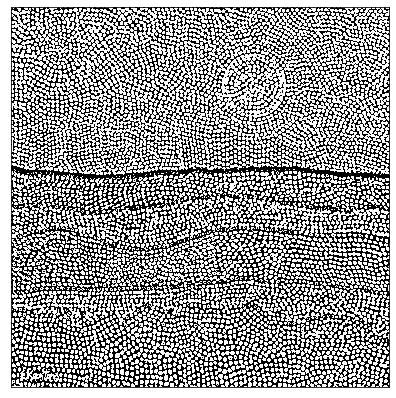

In [16]:
val_niblack=threshold_niblack(pintura_puntos, window_size=55, k=0.1)
img_niblack = pintura_puntos<val_niblack
imshow(img_niblack)
imshow(~img_niblack)
imagenes_cercanas["val_niblack"]=~img_niblack

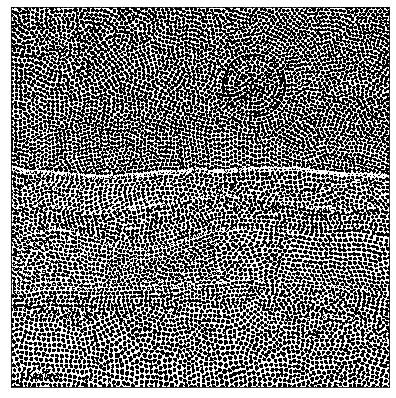

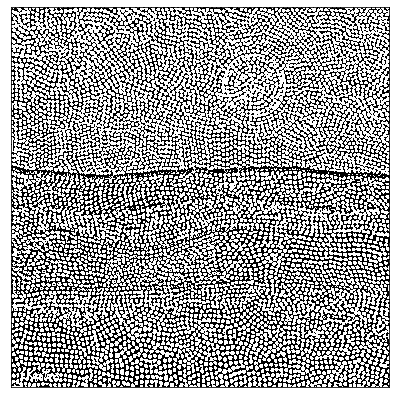

In [17]:
val_niblack=threshold_niblack(pintura_puntos, window_size=45, k=0.2)
img_niblack = pintura_puntos<val_niblack
imshow(img_niblack)
imshow(~img_niblack)

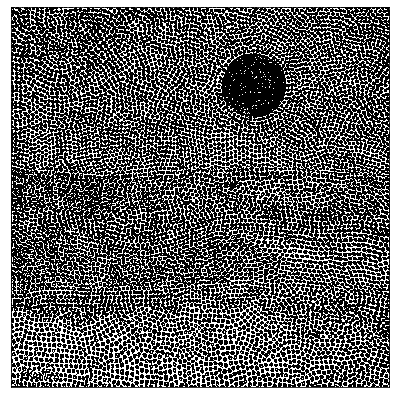

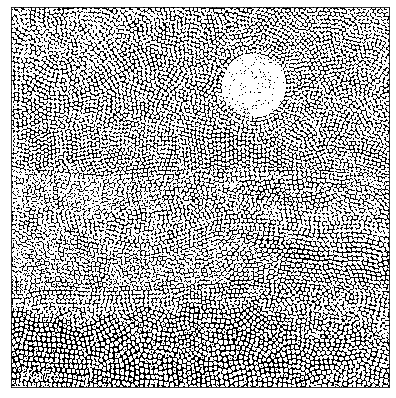

In [18]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=15, k=0.2)
img_sauvola = pintura_puntos < val_sauvola
imshow(img_sauvola)
imshow(~img_sauvola)

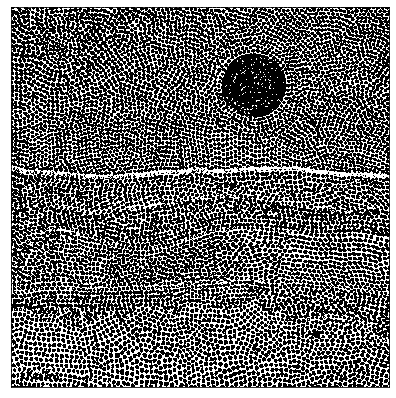

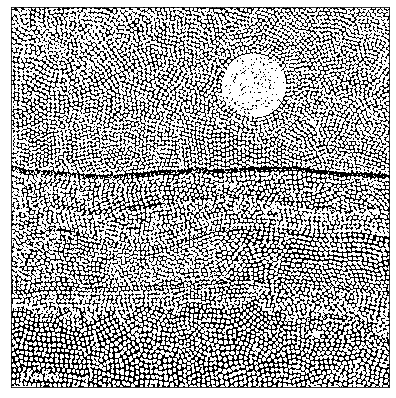

In [19]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=55, k=0.2)
img_sauvola = pintura_puntos < val_sauvola
imshow(img_sauvola)
imshow(~img_sauvola)

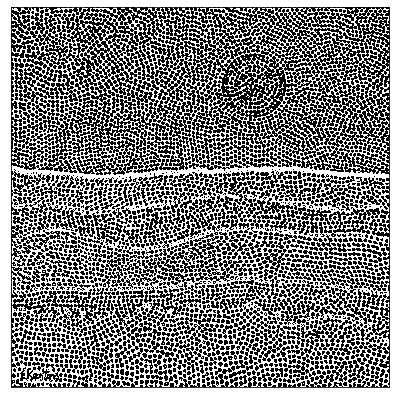

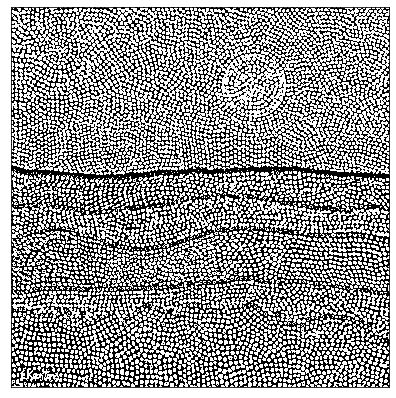

In [20]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=55, k=0.02)
img_sauvola = pintura_puntos < val_sauvola
imshow(img_sauvola)
imshow(~img_sauvola)
imagenes_cercanas["img_sauvola"]=~img_sauvola

# Posible resultado

SyntaxError: invalid syntax (<ipython-input-21-e95e44f7ecbe>, line 1)

In [22]:
def contar_regiones(imagen):
    label_imagen = label(imagen)
    contador = 0
    reg_props = regionprops(label_imagen)
    return len(reg_props)

In [23]:
def mostar_imagenes_totales_por_algoritmo(morofologia):
    for key_algoritmo in imagenes_cercanas.keys():
        for key in lista_algortimo_img_dicos.keys():
            if morofologia+"-"+key_algoritmo==key:
                ndiscos=lista_algortimo_img_dicos[key]['ndiscos']
                algoritmo=lista_algortimo_img_dicos[key]['algoritmo']
                imagen=lista_algortimo_img_dicos[key]['imagen']
                print('Nro. Discos: {0} Algoritmo: {1}'.format(ndiscos,algoritmo))
                imshow(imagen)    

In [24]:
def mostar_imagenes_totales_por_clave(key_lista):
    ndiscos=lista_algortimo_img_dicos[key_lista]['ndiscos']
    algoritmo=lista_algortimo_img_dicos[key_lista]['algoritmo']
    imagen=lista_algortimo_img_dicos[key_lista]['imagen']
    print('Nro. Discos: {0} Algoritmo: {1} Método Morfología:{2}'.format(ndiscos,algoritmo,key_lista))
    imshow(imagen)    

In [25]:
def erosionar_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        imagen_ndiscos = erosion(imagen, forma(n))
        total_discos = contar_regiones(imagen_ndiscos)
        if(total_discos>ndiscos):
            ndiscos = total_discos            
            img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [26]:
for key in imagenes_cercanas.keys():
    print(key)
    img_resultado,ndiscos=erosionar_imagen(imagenes_cercanas[key],n_iteraciones)
    lista_algortimo_img_dicos["erosionar_imagen_disco-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}

local_mean
val_niblack
img_sauvola


Nro. Discos: 7645 Algoritmo: local_mean


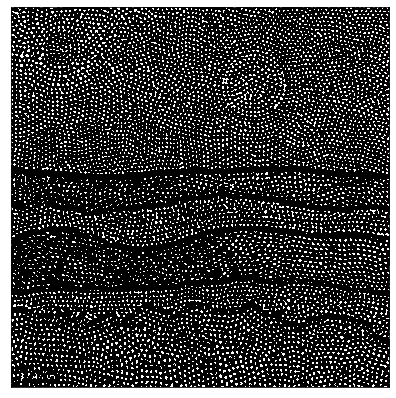

Nro. Discos: 7574 Algoritmo: val_niblack


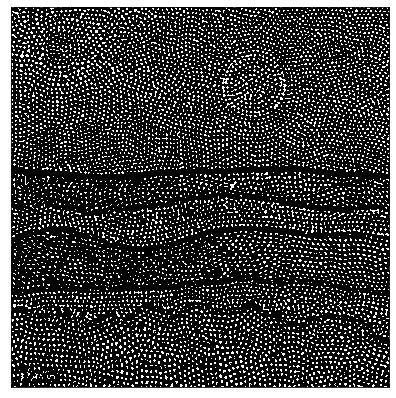

Nro. Discos: 7603 Algoritmo: img_sauvola


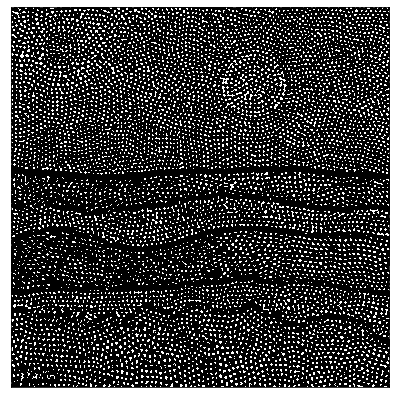

In [27]:
mostar_imagenes_totales_por_algoritmo("erosionar_imagen_disco")

In [28]:
for key in imagenes_cercanas.keys():
    print(key)
    img_resultado,ndiscos = erosionar_imagen(imagenes_cercanas[key],n_iteraciones,forma=diamond)
    lista_algortimo_img_dicos["erosionar_imagen_diamond-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}

local_mean
val_niblack
img_sauvola


Nro. Discos: 7527 Algoritmo: local_mean


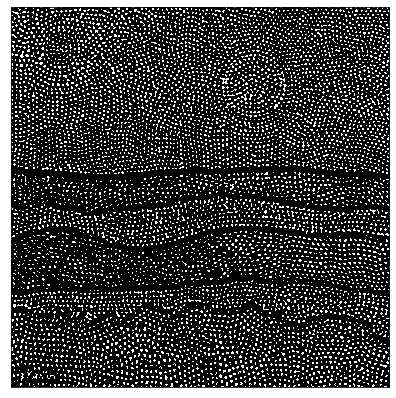

Nro. Discos: 7418 Algoritmo: val_niblack


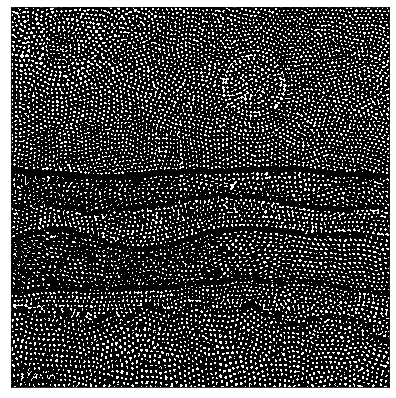

Nro. Discos: 7464 Algoritmo: img_sauvola


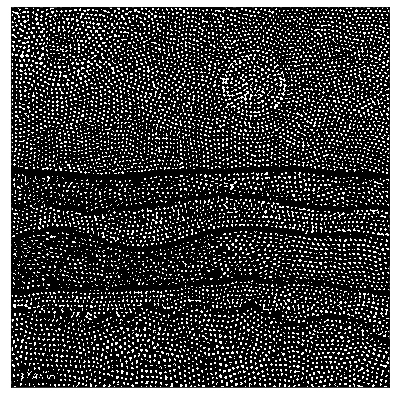

In [29]:
mostar_imagenes_totales_por_algoritmo("erosionar_imagen_diamond")

In [33]:
for key in imagenes_cercanas.keys():
    print(key)
    try:
        erosionar_imagen(imagenes_cercanas[key],n_iteraciones,ball)
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean
 footprint array has incorrect shape
val_niblack
 footprint array has incorrect shape
img_sauvola
 footprint array has incorrect shape


In [34]:
for key in imagenes_cercanas.keys():
    print(key)
    try:
        erosionar_imagen(imagenes_cercanas[key],n_iteraciones,rectangle)
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean


TypeError: rectangle() missing 1 required positional argument: 'height'

In [35]:
def open_clos_imagen(nombre,imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        ope  =  opening(imagen, forma(n))       
        imagen_ndiscos =  closing(ope, forma(n))       
        total_discos = contar_regiones(imagen_ndiscos)
        if(total_discos>ndiscos):
            ndiscos = total_discos            
            img_resultado = imagen_ndiscos
    return img_resultado,ndiscos      

In [36]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=open_clos_imagen(key,imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["open_clos_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean
val_niblack
img_sauvola


Nro. Discos: 4775 Algoritmo: local_mean


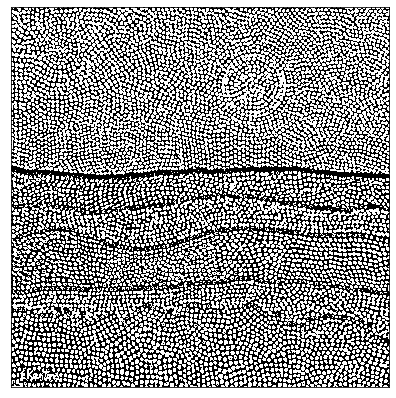

Nro. Discos: 4088 Algoritmo: val_niblack


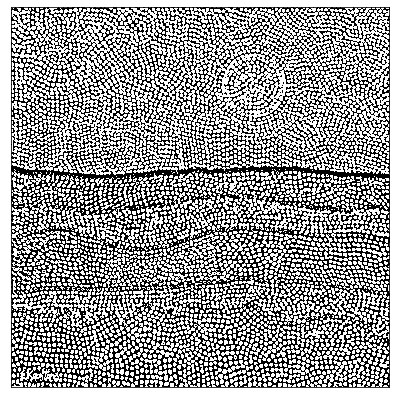

Nro. Discos: 4481 Algoritmo: img_sauvola


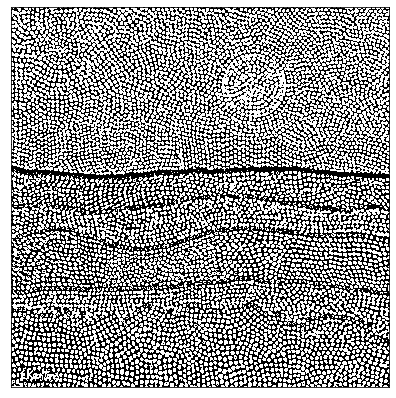

In [37]:
mostar_imagenes_totales_por_algoritmo("open_clos_imagen")

In [38]:
def open_mayor_clos_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):
        ope  =  opening(imagen, forma(n))
        for n in range(1,ndimesion):
            imagen_ndiscos =  closing(ope, forma(n))       
            total_discos = contar_regiones(imagen_ndiscos)
            if(total_discos>ndiscos):
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos      

In [39]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=open_mayor_clos_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["open_mayor_clos_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean
val_niblack
img_sauvola


Nro. Discos: 5331 Algoritmo: local_mean


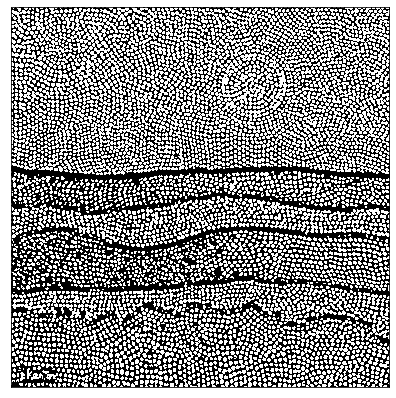

Nro. Discos: 4840 Algoritmo: val_niblack


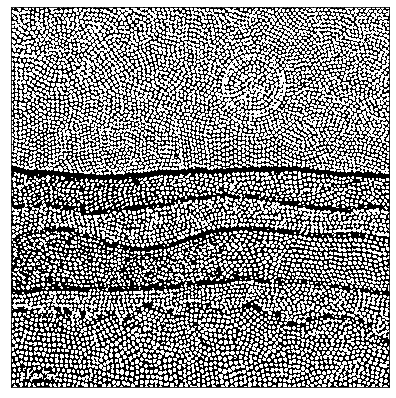

Nro. Discos: 5108 Algoritmo: img_sauvola


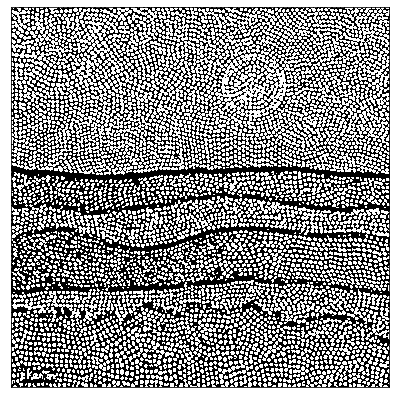

In [40]:
mostar_imagenes_totales_por_algoritmo("open_mayor_clos_imagen")

In [41]:
def mayor_open_clos_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):
        clos =  closing(imagen, forma(n))       
        for n in range(1,ndimesion):
            imagen_ndiscos  =  opening(clos, forma(n))
            total_discos = contar_regiones(imagen_ndiscos)
            if(total_discos>ndiscos):
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [42]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=mayor_open_clos_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["mayor_open_clos_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean
val_niblack
img_sauvola


Nro. Discos: 5693 Algoritmo: local_mean


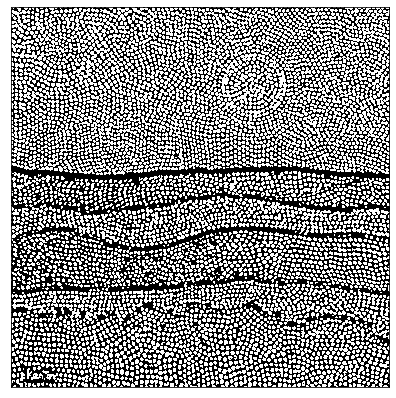

Nro. Discos: 5270 Algoritmo: val_niblack


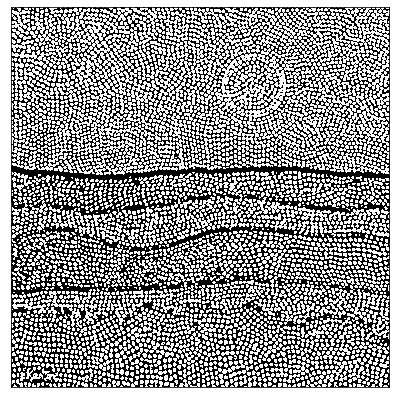

Nro. Discos: 5520 Algoritmo: img_sauvola


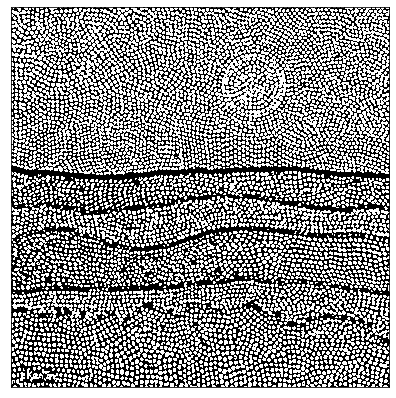

In [43]:
mostar_imagenes_totales_por_algoritmo("mayor_open_clos_imagen")

In [44]:
def eros_open_clos_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        eros =  erosion(imagen, forma(n))       
        for n in range(1,ndimesion):            
            ope  =  opening(eros, forma(n))       
            imagen_ndiscos =  closing(ope, forma(n))       
            total_discos = contar_regiones(imagen_ndiscos)
            if(total_discos>ndiscos):
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [45]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=eros_open_clos_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["eros_open_clos_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean
val_niblack
img_sauvola


Nro. Discos: 7320 Algoritmo: local_mean


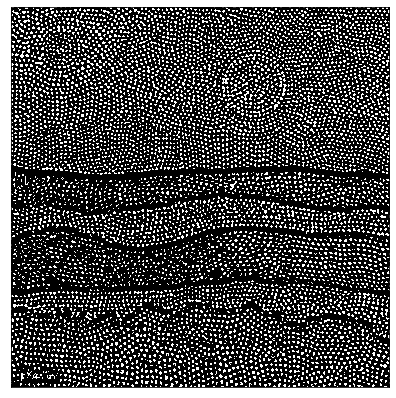

Nro. Discos: 7356 Algoritmo: val_niblack


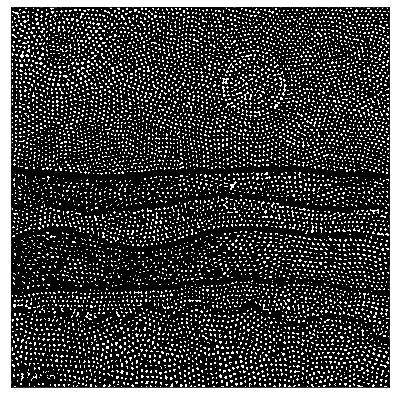

Nro. Discos: 7326 Algoritmo: img_sauvola


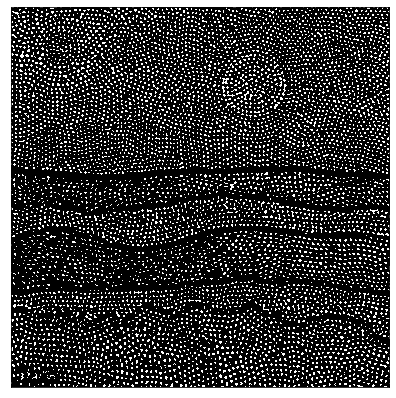

In [46]:
mostar_imagenes_totales_por_algoritmo("eros_open_clos_imagen")

In [47]:
def open_clos_eros_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        ope  =  opening(imagen, forma(n))       
        clos =  closing(ope, forma(n))       
        for n in range(1,ndimesion):            
            imagen_ndiscos =  erosion(clos, forma(n))       
            total_discos = contar_regiones(imagen_ndiscos)
            if(total_discos>ndiscos):
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [48]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=open_clos_eros_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["open_clos_eros_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean
val_niblack
img_sauvola


Nro. Discos: 7454 Algoritmo: local_mean


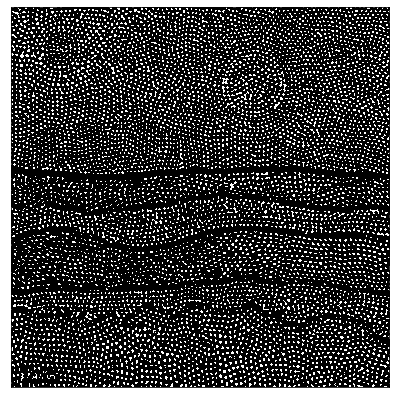

Nro. Discos: 7309 Algoritmo: val_niblack


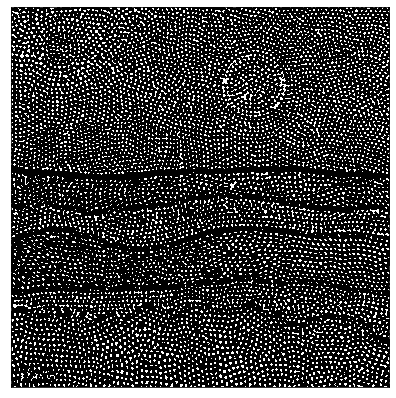

Nro. Discos: 7373 Algoritmo: img_sauvola


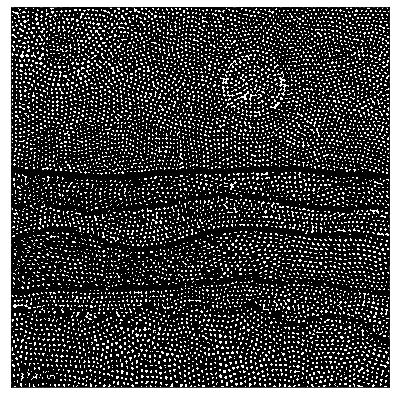

In [49]:
mostar_imagenes_totales_por_algoritmo("open_clos_eros_imagen")

In [50]:
def eros_open_clos_fill_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):            
        eros =  erosion(imagen, forma(n))          
        for n in range(1,ndimesion):
            ope  =  opening(eros, forma(n))       
            clos =  closing(ope, forma(n)) 
            imagen_ndiscos = ndi.binary_fill_holes(clos, forma(1))            
            total_discos = contar_regiones(imagen_ndiscos)
            if total_discos>ndiscos:
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [51]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=eros_open_clos_fill_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["eros_open_clos_fill_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean
val_niblack
img_sauvola


Nro. Discos: 7320 Algoritmo: local_mean


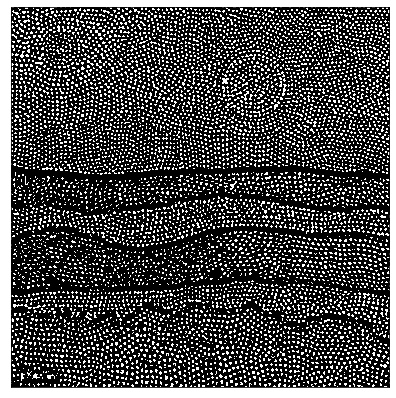

Nro. Discos: 7356 Algoritmo: val_niblack


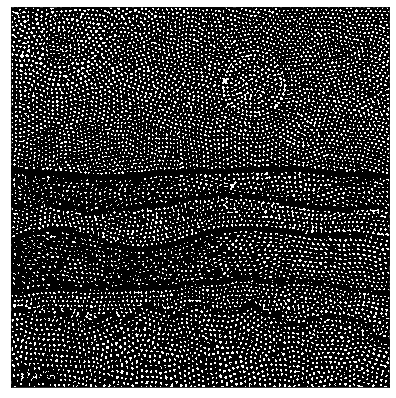

Nro. Discos: 7326 Algoritmo: img_sauvola


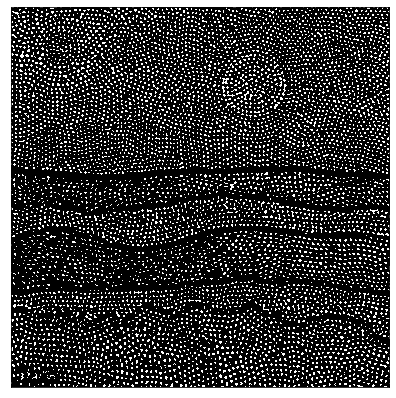

In [52]:
mostar_imagenes_totales_por_algoritmo("eros_open_clos_fill_imagen")

In [53]:
def eros_open_clos_fill_dil_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        eros =  erosion(imagen, forma(n))          
        for n in range(1,ndimesion):            
            ope  =  opening(eros, forma(n))       
            clos =  closing(ope, forma(n)) 
            imfill = ndi.binary_fill_holes(clos, forma(1))
            imagen_ndiscos =  dilation(imfill, forma(1))                      
            total_discos = contar_regiones(imagen_ndiscos)
            if total_discos>ndiscos:
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [54]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=eros_open_clos_fill_dil_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["eros_open_clos_fill_dil_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print("footprint array has incorrect shape")

local_mean
val_niblack
img_sauvola


Nro. Discos: 7235 Algoritmo: local_mean


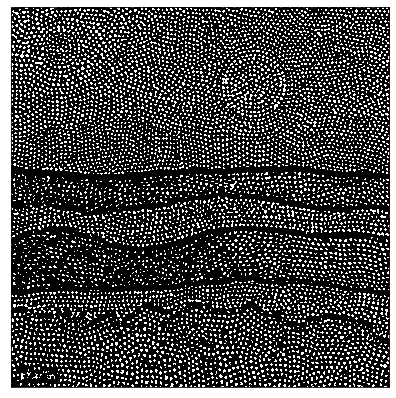

Nro. Discos: 7292 Algoritmo: val_niblack


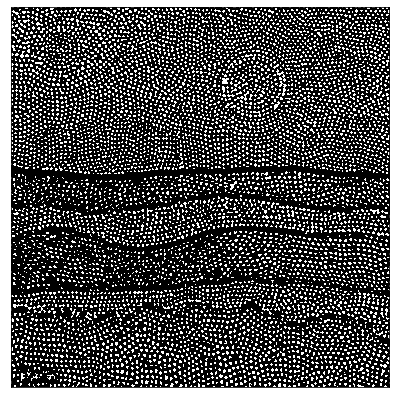

Nro. Discos: 7267 Algoritmo: img_sauvola


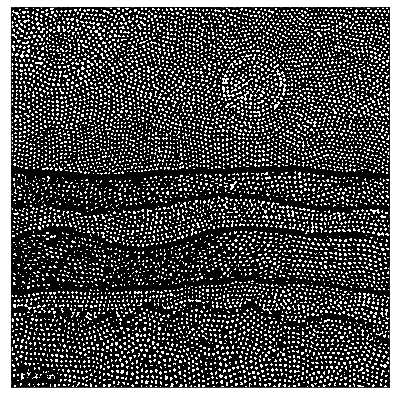

In [55]:
mostar_imagenes_totales_por_algoritmo("eros_open_clos_fill_dil_imagen")

In [56]:
def buscar_top_maximizar_puntos():
    return sorted(lista_algortimo_img_dicos.items(), key=lambda x: x[1]['ndiscos'], reverse=True)

Nro. Discos: 7645 Algoritmo: local_mean Método Morfología:erosionar_imagen_disco-local_mean


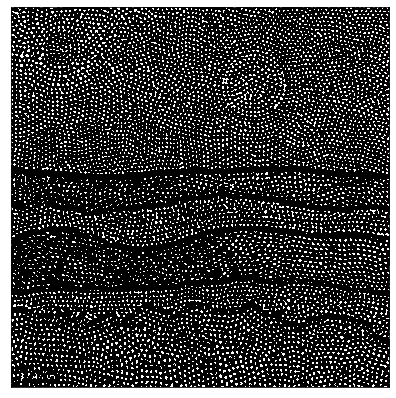

Nro. Discos: 7603 Algoritmo: img_sauvola Método Morfología:erosionar_imagen_disco-img_sauvola


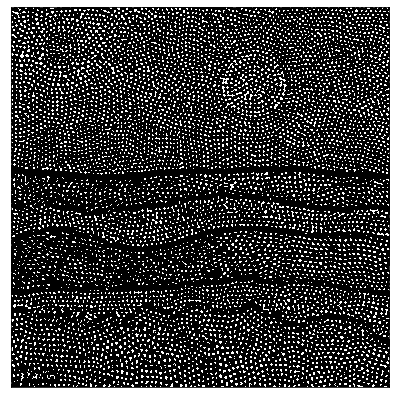

Nro. Discos: 7574 Algoritmo: val_niblack Método Morfología:erosionar_imagen_disco-val_niblack


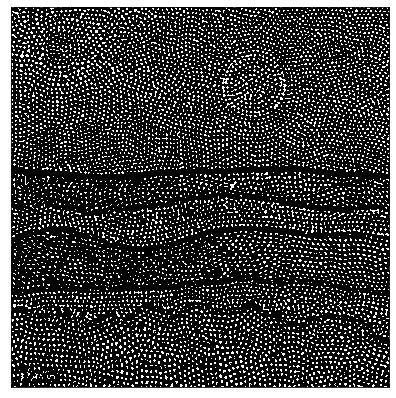

Nro. Discos: 7527 Algoritmo: local_mean Método Morfología:erosionar_imagen_diamond-local_mean


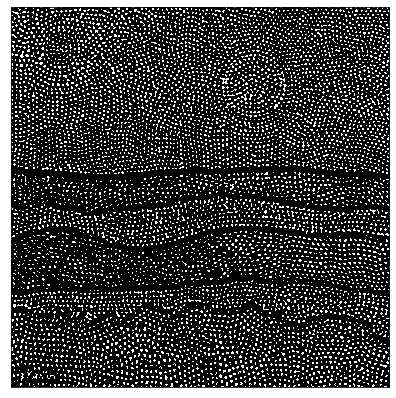

Nro. Discos: 7464 Algoritmo: img_sauvola Método Morfología:erosionar_imagen_diamond-img_sauvola


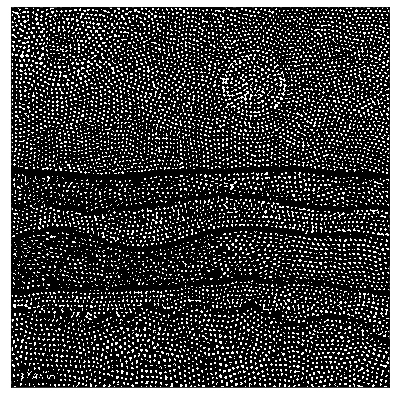

Nro. Discos: 7454 Algoritmo: local_mean Método Morfología:open_clos_eros_imagen-local_mean


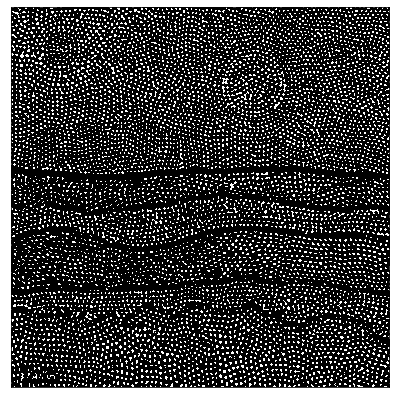

Nro. Discos: 7418 Algoritmo: val_niblack Método Morfología:erosionar_imagen_diamond-val_niblack


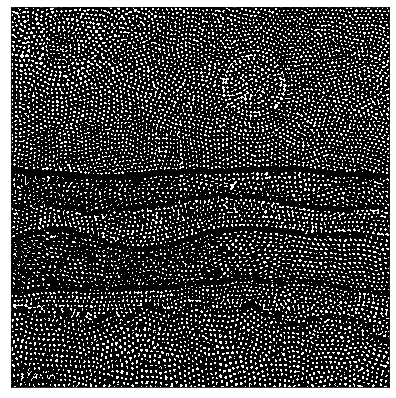

Nro. Discos: 7373 Algoritmo: img_sauvola Método Morfología:open_clos_eros_imagen-img_sauvola


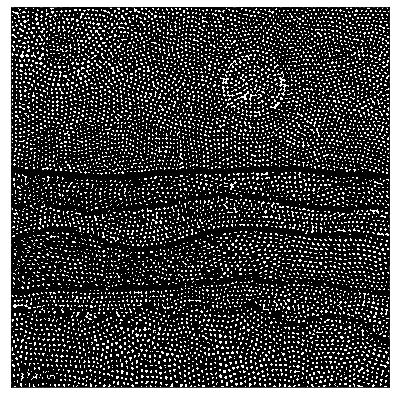

Nro. Discos: 7356 Algoritmo: val_niblack Método Morfología:eros_open_clos_imagen-val_niblack


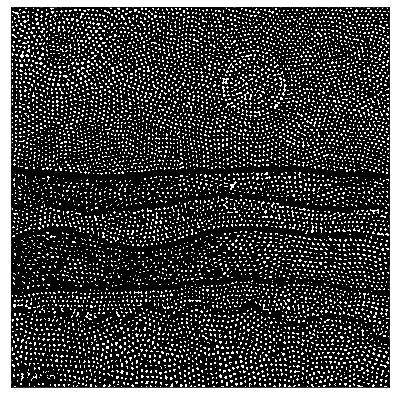

Nro. Discos: 7356 Algoritmo: val_niblack Método Morfología:eros_open_clos_fill_imagen-val_niblack


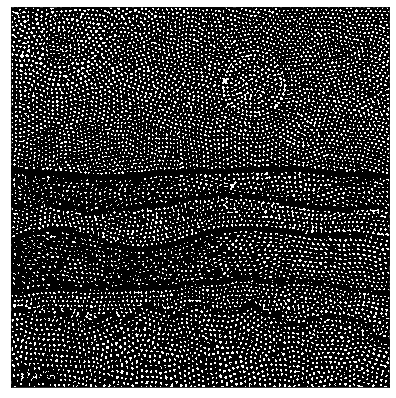

In [58]:
lista_ordenada = buscar_top_maximizar_puntos()
max_top_imagenes = 10 
contador = 0
for key in lista_ordenada:
    if contador < max_top_imagenes:
        mostar_imagenes_totales_por_clave(key[0])
        contador+=1